Machine Learning:
1. Observaciones etiquetadas
2. Un set de entrenamiento
3. Tener un set de prueba
4. Machine Learner: Aprendizaje supervisado.
5. Una vez entrenado, se usará como un modelo predictivo
6. Estadísticos

ML Supervisado:
Existe regresión y clasificación

Clasificación:
1. Retención de clientes
2. Diagnósticos
3. Clasificación de imágenes

Resumen: Módelos de regresión Lineal y regresión Logística.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def estimate_b0_b1(x, y):
    n = np.size(x)
    #Sacamos los promedios de x e y
    m_x, m_y = np.mean(x), np.mean(y)

    #Calcular sumatoria de XY y mi sumatoria de XX
    sum_xy = np.sum((x-m_x)*(y-m_y))
    sum_xx = np.sum(x*(x-m_x))

    #Coeficientes de regresión
    b_1 = sum_xy/sum_xx
    b_0 = m_y - b_1*m_x
    return (b_0, b_1)  #print(f'Y = {b_1}X + {b_0}')

#Función de graficado
def plot_regresion(x, y, b):
    plt.scatter(x, y,  color = 'g', marker = 'o', s = 30)

    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color = 'b')

    #Etiquetado
    plt.xlabel('x-Independiente')
    plt.ylabel('y-Dependiente')
    
    plt.show()

Y = 0.9X + 1.5


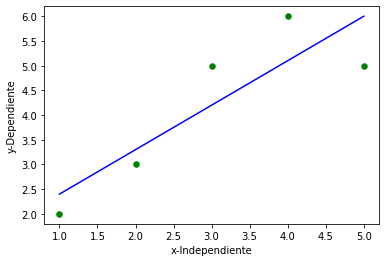

In [6]:
#Código Main
def main():
    x = np.array([1, 2, 3, 4, 5])
    y = np.array([2, 3, 5, 6, 5])

    #Obtenemos b1 y b2
    b = estimate_b0_b1(x, y)
    print(f'Y = {b[1]}X + {b[0]}')
    plot_regresion(x, y, b)

if __name__ == '__main__':
    main()
